# Act Report

 I have worked on three source files for Udacity's data wrangling project.
Firstly, I collected data from CSV files, JSON text files, and scraping data from Twitter API. Then I merged the data into a single data frame. I assessed the data for underlying issues. I resolved them one by one. I described in detail each step in the Wrangel report. So, here I am going to talk about the only visualizations and overall results of data in detail.

In [1]:
# all needed libraries
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [2]:
df_twitter_clean = pd.read_csv('twitter_archive_master.csv') # saved master data file 
df_twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.00,10.0,Phineas,35039,7363,8968977,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,None,NaN
1,679877062409191424,2015-12-24 04:11:37,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.00,10.0,Penelope,1890,617,8968992,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,NaN,0.000000,None,NaN
2,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.00,10.0,Emmie,2486,818,8968992,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None,NaN
3,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.00,10.0,by,12298,8561,8968992,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,NaN,0.000000,None,NaN
4,680115823365742593,2015-12-24 20:00:22,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.00,10.0,Ozzy,2615,863,8968992,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,pug,0.999365,None,male
5,680130881361686529,2015-12-24 21:00:12,Twitter for iPhone,This is Reggie. His Santa hat is a little big....,https://twitter.com/dog_rates/status/680130881...,10.00,10.0,Reggie,2203,896,8968992,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,Maltese_dog,0.199121,None,male
6,680161097740095489,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12.00,10.0,Goliath,2235,701,8968992,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,bluetick,0.268681,None,NaN
7,680206703334408192,2015-12-25 02:01:30,Twitter for iPhone,I hope everyone enjoys this picture as much as...,https://twitter.com/dog_rates/status/680206703...,12.00,10.0,Toby,2714,1107,8968992,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,NaN,0.000000,None,NaN
8,680221482581123072,2015-12-25 03:00:14,Twitter for iPhone,This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10.00,10.0,CeCe,1419,280,8968992,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,NaN,0.000000,None,NaN
9,680440374763077632,2015-12-25 17:30:01,Twitter for iPhone,Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11.00,10.0,None,1398,475,8968992,https://pbs.twimg.com/ext_tw_video_thumb/68044...,NaN,0.000000,None,NaN


In [7]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(object)
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean['source'] = df_twitter_clean['source'].astype('category')
df_twitter_clean['life_stage'] = df_twitter_clean['life_stage'].astype('category')
df_twitter_clean['dog_gender'] = df_twitter_clean['dog_gender'].astype('category')

df_twitter_clean.set_index('timestamp', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'timestamp'

# Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heat Map')

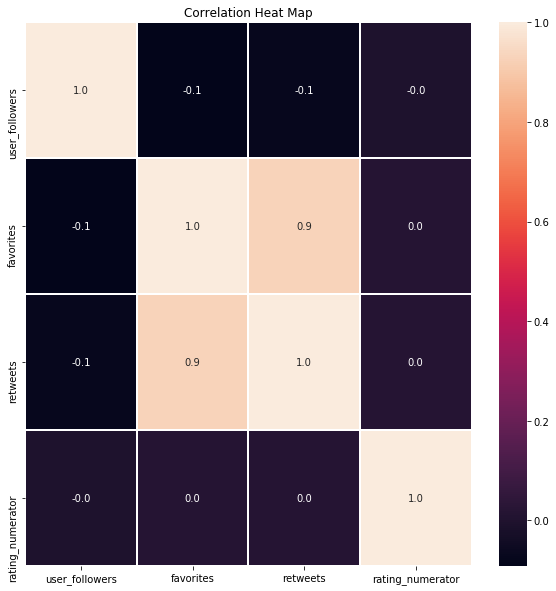

In [9]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_twitter_clean[['source','user_followers','favorites','retweets',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

# Pie chart of Life stage of dogs

(-1.2880425899576236,
 1.2294910472489025,
 -1.242045058494045,
 1.2111704804959476)

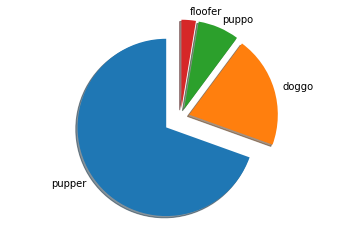

In [5]:
df_count_stages = list(df_twitter_clean[df_twitter_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_clean[df_twitter_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) #we can use the explosion property of slices of a pie chart to make it more efficient

figure1, axis1 = plt.subplots()
axis1.pie(df_count_stages, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

From above pie chart,dogs in pupper life stage got most tweets followed by doggo and puppo.

# Scatter plot between favorites and retweets.

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

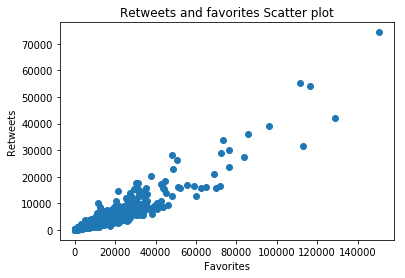

In [6]:
plt.scatter(df_twitter_clean['favorites'], df_twitter_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

## Analysis

-There is a strong correlation between favorites and retweets.

-Negative correlation among user followers and retweets.

-Dogs in the Pupper stage get most tweets.

-There is a big positive 0.9 correlation shown by the correlation heat map between the retweets and favorites. This means retweets and favorites have a strong positive relationship.

## Conclusion

Through all the analysis I made, I can say that the Twitter data of WeRateDogs gives us a lot of interesting perceptions about people who tweet about the different breeds of dogs within their different life stages.Interestingly,the Pupper stage of dog's life got the most of tweets followed by Doggo. Moreover, having more followers on Twitter doesn't increase the retweets of user's tweets.